In [46]:
import pandas as pd

data = pd.read_csv('data.csv')

# Display the first few rows and general information about the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


(None,
    Unnamed: 0  acousticness  danceability  duration_ms  energy  \
 0           0        0.0102         0.833       204600   0.434   
 1           1        0.1990         0.743       326933   0.359   
 2           2        0.0344         0.838       185707   0.412   
 3           3        0.6040         0.494       199413   0.338   
 4           4        0.1800         0.678       392893   0.561   
 
    instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
 0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
 1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
 2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
 3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
 4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   
 
    time_signature  valence  target      song_title            artist  
 0             4.0    0.286       1        Mask Off  

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Selecting only the numeric columns related to song features for scaling
features = data.select_dtypes(include=['float64', 'int64']).drop(columns=['Unnamed: 0', 'target'])

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying PCA to reduce dimensions while capturing maximum variance (choosing 2 components for visualization)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Creating a DataFrame with the PCA components for visualization
pca_df = pd.DataFrame(pca_features, columns=['PCA1', 'PCA2'])
pca_df.head()


,PCA1,PCA2
0,0.281200,0.937419
1,-1.081934,0.946599
2,-0.218232,1.563727
3,-3.652610,0.378679
4,-0.614861,-0.466870


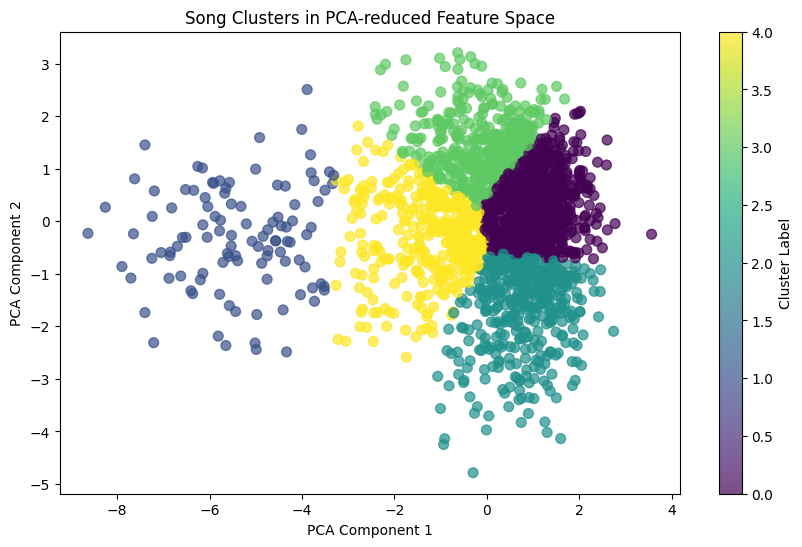

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,Cluster
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future,3
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino,3
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future,3
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House,1
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys,4


In [48]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Applying K-means clustering with an initial guess of 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(pca_df)

# Adding the cluster labels to the PCA DataFrame
pca_df['Cluster'] = kmeans.labels_

# Visualizing the clusters formed in the PCA-reduced feature space
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title('Song Clusters in PCA-reduced Feature Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Displaying a sample of the clustered data with original features
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = kmeans.labels_
data_with_clusters.head()


In [ ]:
import numpy as np

# Example: New song features in the same order as the original dataset
# new_song = np.array(data_with_clusters[['acousticness', 'danceability', 'duration_ms', 'energy',
#                       'instrumentalness', 'key', 'liveness', 'loudness','mode',
#                       'speechiness', 'tempo', 'time_signature', 'valence']])




#new_song=[[0.581, 0.825, 233713.0, 0.652, 0.0, 1.0, 0.0931, -3.183, 0.0, 0.0802, 95.977, 4.0, 0.933]] #---happy(4)
#new_song=[[0.202, 0.497, 249640, 0.604, 0, 2, 0.299, -9.438, 1, 0.0313, 131.935, 4, 0.225]]#--sad(3)
#new_song=[[0.0249, 0.683, 201049, 0.824, 0.627, 1, 0.0533, -8.569, 0, 0.222, 154.008, 4, 0.921]] #--sad(3)
#new_song=[[0.0132	,0.807	,330920,	0.778,	0.666,	0,	0.109	,-5.485	,1	,0.0399	,120.001,	4,	0.797]]#---happy(4)



def predict(new_song_name):
    new_song=data.loc[data['song_title'] == new_song_name, [
            'acousticness', 'danceability', 'duration_ms', 'energy',
            'instrumentalness', 'key', 'liveness', 'loudness','mode',
            'speechiness', 'tempo', 'time_signature', 'valence'
        ]]
    new_song = new_song.iloc[0].tolist()
    new_song=[new_song]
    new_song_scaled = scaler.transform(new_song)

    # Step 2: Apply PCA transformation
    new_song_pca = pca.transform(new_song_scaled)

    # Step 3: Predict the cluster
    predicted_cluster = kmeans.predict(new_song_pca)
    label={
        0:"Energetic",
        1:"Relaxing",
        2:"Sad",
        3:"Happy",
        4:"others"
    }

    print(f"The new song falls into cluster: {label[predicted_cluster[0]]}")




In [63]:
predict("Hard Times")

The new song falls into cluster: Energetic


c:\Users\syamk\Desktop\Songs_classifing_App\songapp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\syamk\Desktop\Songs_classifing_App\songapp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Energetic:
Hard Times
Make U Love Me


In [6]:
# Step 1: Predict clusters for the entire dataset
data_with_clusters['Cluster'] = kmeans.predict(pca_features)

# Step 2: Assign labels to the clusters
label = {
    0:"other",
    1:"Relaxing",
    2:"Energetic",
    3:"Sad",
    4:"Happy"  # Adjust the labels as per your analysis
}

# Step 3: Map the cluster labels to descriptive names
data_with_clusters['Mood'] = data_with_clusters['Cluster'].map(label)

# Step 4: Display the dataset with the new 'Mood' column
print(data_with_clusters.head())

# Optional: Save the labeled dataset to a CSV file
data_with_clusters.to_csv('labeled_songs.csv', index=False)
print("Dataset with mood labels saved as 'labeled_songs_with_moods.csv'.")


   Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target      song_title            artist  Cluster  \
0             4.0    0.286       1        Mask Off            Fut

c:\Users\syamk\Desktop\Songs_classifing_App\songapp\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
# Step 1: Filter songs labeled as 'Happy'
happy_songs = data_with_clusters[data_with_clusters['Mood'] == 'Happy']

# Step 2: Display the filtered dataset
print("Songs labeled as 'Happy':")
print(happy_songs['song_title'])

# Optional: Save the filtered data to a CSV file
happy_songs.to_csv('happy_songs.csv', index=False)
print("Happy songs saved as 'happy_songs.csv'.")


Songs labeled as 'Happy':
4                                       Parallel Lines
7                                      Gyöngyhajú lány
12                                             Cemalim
14                                             Oh lala
24                               If I Gave You My Love
                             ...                      
1963                                  Every Loser Wins
1965    I'd Do Anything For Love (But I Won't Do That)
1970                                    Fuck You Bitch
1979                              300 Violin Orchestra
1981                                     Party Monster
Name: song_title, Length: 367, dtype: object
Happy songs saved as 'happy_songs.csv'.


In [13]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


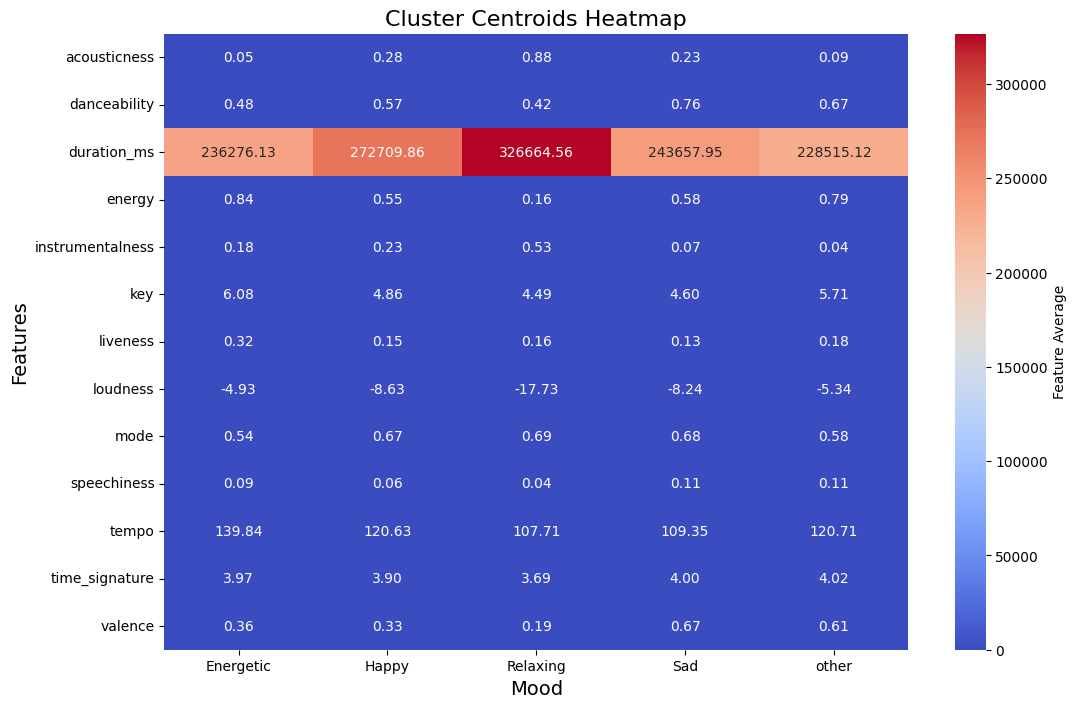

In [ ]:
# Calculate feature averages for each cluster
import matplotlib.pyplot as plt
import seaborn as sns

cluster_centroids = data_with_clusters.groupby('Mood')[features.columns].mean()

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_centroids.T, cmap='coolwarm', annot=True, fmt='.2f', cbar_kws={'label': 'Feature Average'})
plt.title('Cluster Centroids Heatmap', fontsize=16)
plt.xlabel('Mood', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()


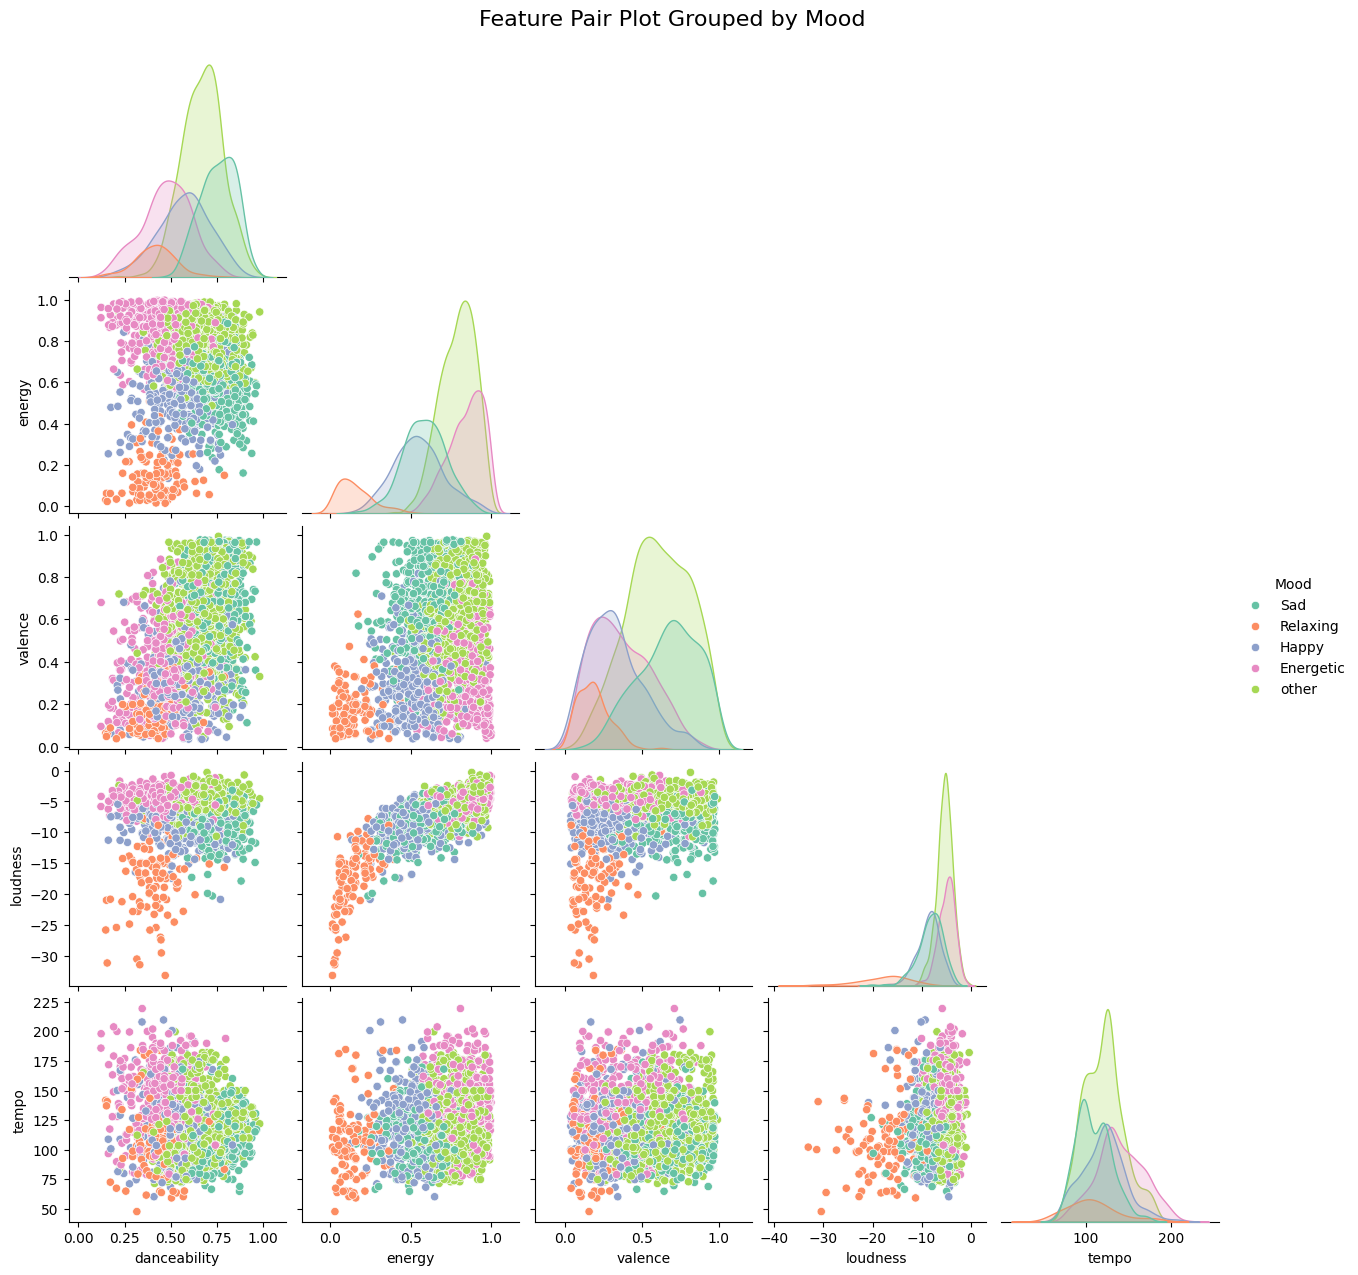

In [18]:
# Subset of key features for pair plot visualization
selected_features = ['danceability', 'energy', 'valence', 'loudness', 'tempo']

sns.pairplot(data_with_clusters, vars=selected_features, hue='Mood', palette='Set2', diag_kind='kde', corner=True)
plt.suptitle('Feature Pair Plot Grouped by Mood', y=1.02, fontsize=16)
plt.show()


C:\Users\syamk\AppData\Local\Temp\ipykernel_34024\945608603.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_with_clusters, x='Mood', palette='Set2')


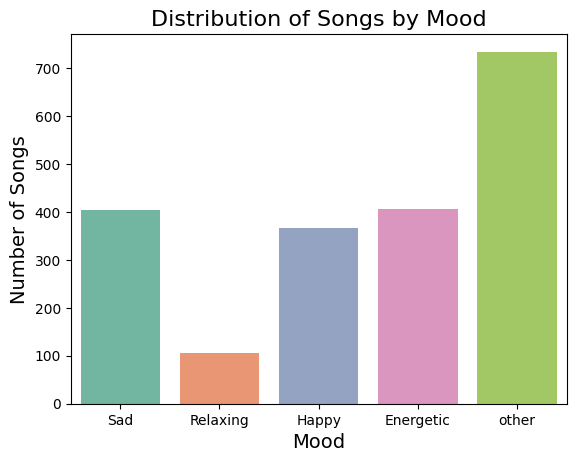

In [20]:
sns.countplot(data=data_with_clusters, x='Mood', palette='Set2')
plt.title('Distribution of Songs by Mood', fontsize=16)
plt.xlabel('Mood', fontsize=14)
plt.ylabel('Number of Songs', fontsize=14)
plt.show()


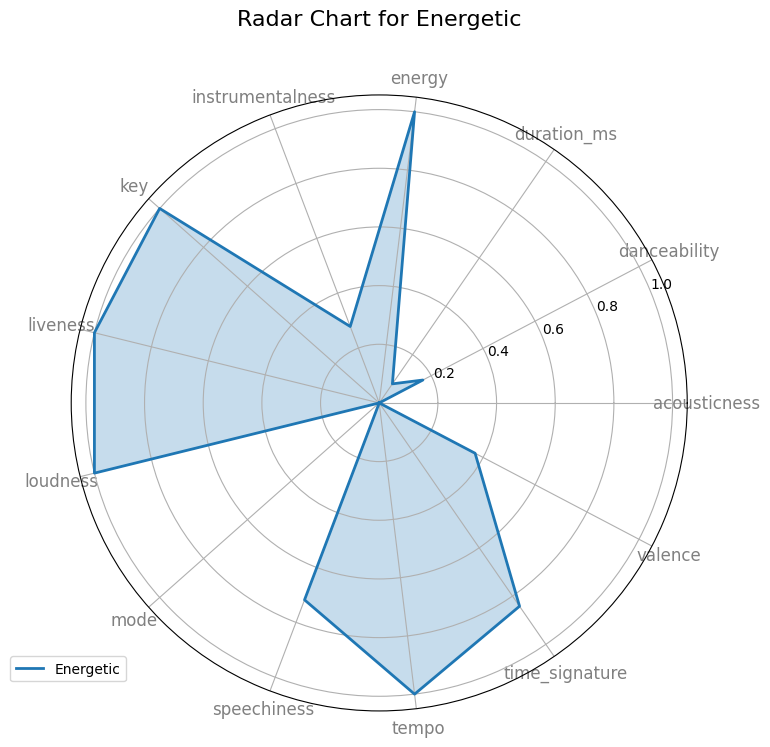

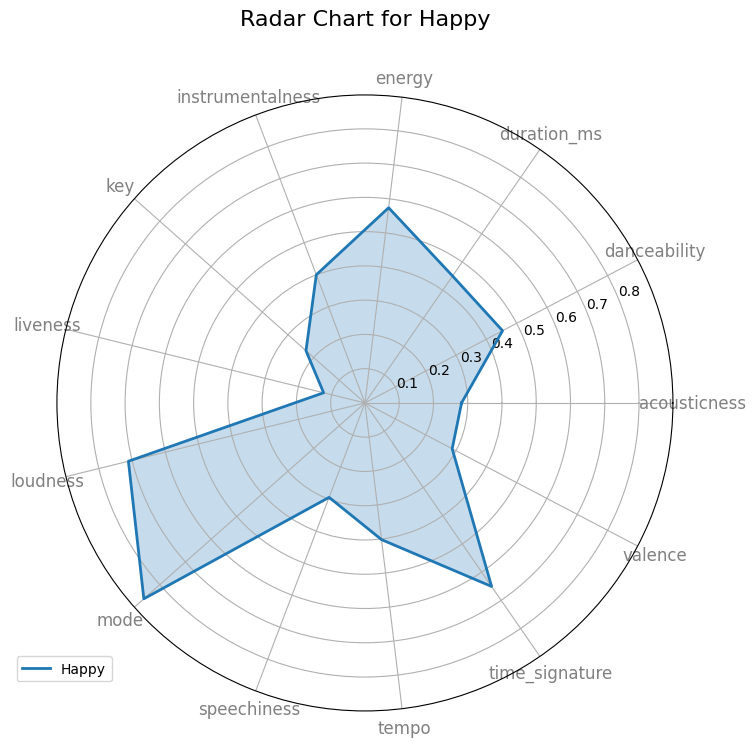

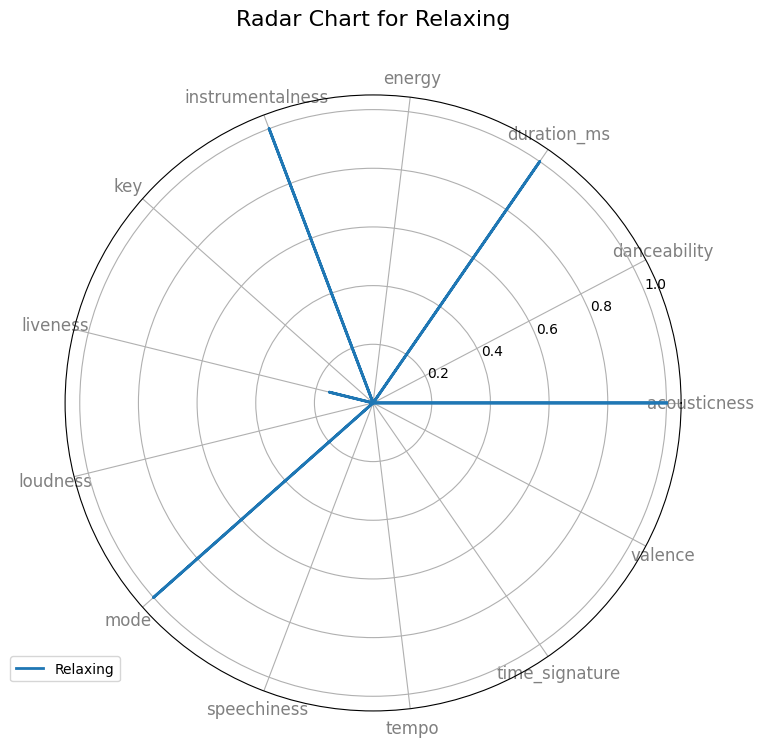

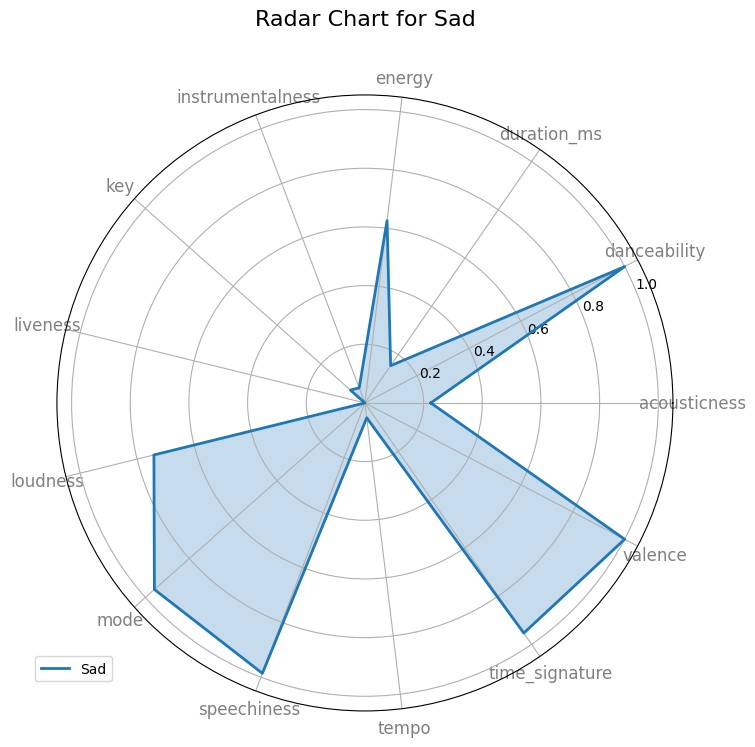

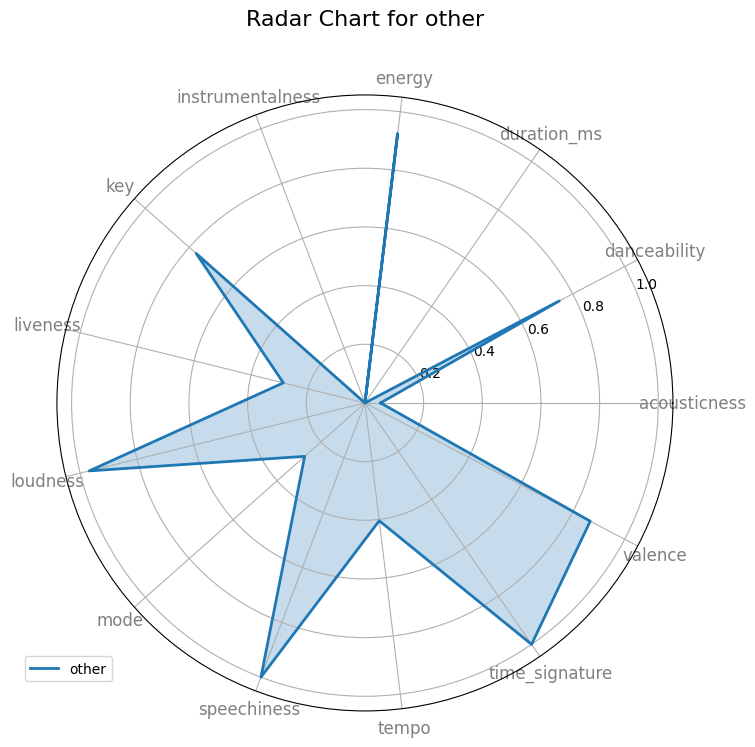

In [21]:
from math import pi

# Normalize feature values for radar chart
normalized_centroids = (cluster_centroids - cluster_centroids.min()) / (cluster_centroids.max() - cluster_centroids.min())

# Radar chart setup
categories = normalized_centroids.columns
num_vars = len(categories)

# Create radar chart for each mood
for mood in normalized_centroids.index:
    values = normalized_centroids.loc[mood].values.flatten().tolist()
    values += values[:1]  # Close the loop
    
    angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
    angles += angles[:1]
    
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories, color='grey', size=12)
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=mood)
    ax.fill(angles, values, alpha=0.25)
    plt.title(f'Radar Chart for {mood}', size=16, color='black', y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()


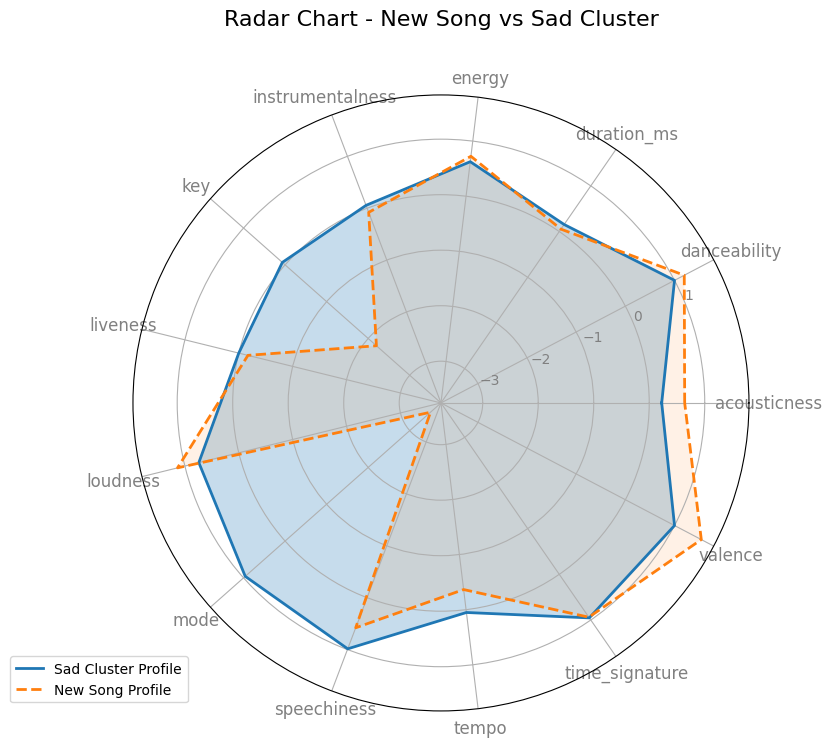

In [24]:
from math import pi
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Normalize the cluster centroids
cluster_centroids = data_with_clusters.groupby('Mood')[features.columns].mean()
normalized_centroids = (cluster_centroids - cluster_centroids.min()) / (cluster_centroids.max() - cluster_centroids.min())

# Step 2: Normalize the new song's features
new_song_df = pd.DataFrame(new_song, columns=features.columns)
normalized_new_song = (new_song_df - cluster_centroids.min()) / (cluster_centroids.max() - cluster_centroids.min())

# Step 3: Select the cluster predicted for the new song
predicted_mood = label[predicted_cluster[0]]
predicted_cluster_centroid = normalized_centroids.loc[predicted_mood]

# Step 4: Prepare data for radar chart
categories = features.columns
num_vars = len(categories)

# Angles for radar chart
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Values for the radar chart
cluster_values = predicted_cluster_centroid.values.flatten().tolist()
new_song_values = normalized_new_song.values.flatten().tolist()

cluster_values += cluster_values[:1]  # Close the loop
new_song_values += new_song_values[:1]

# Step 5: Plot radar chart
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Add cluster centroid
ax.plot(angles, cluster_values, linewidth=2, linestyle='solid', label=f'{predicted_mood} Cluster Profile')
ax.fill(angles, cluster_values, alpha=0.25)

# Add new song profile
ax.plot(angles, new_song_values, linewidth=2, linestyle='dashed', label='New Song Profile')
ax.fill(angles, new_song_values, alpha=0.1)

# Customize chart
plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(color='grey', size=10)
plt.title(f'Radar Chart - New Song vs {predicted_mood} Cluster', size=16, color='black', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()
